# Predicting Stroke With KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
strokeData = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
strokeData.count()['id']

5110

In [4]:
strokeData.groupby('stroke')['id'].count()

stroke
0    4861
1     249
Name: id, dtype: int64

In [5]:
strokeData.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
strokeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
strokeData.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<AxesSubplot:xlabel='ever_married', ylabel='count'>

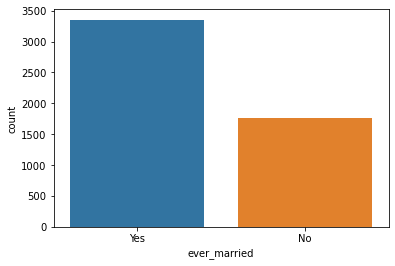

In [8]:
sns.countplot(x='ever_married', data=strokeData)

<AxesSubplot:xlabel='age', ylabel='Count'>

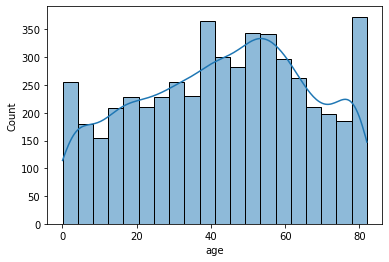

In [9]:
sns.histplot(strokeData['age'], kde=True)

<AxesSubplot:xlabel='Residence_type', ylabel='age'>

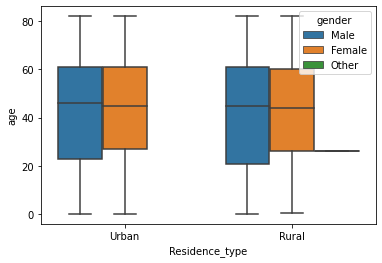

In [10]:
sns.boxplot(y='age', x='Residence_type', hue='gender', data=strokeData)

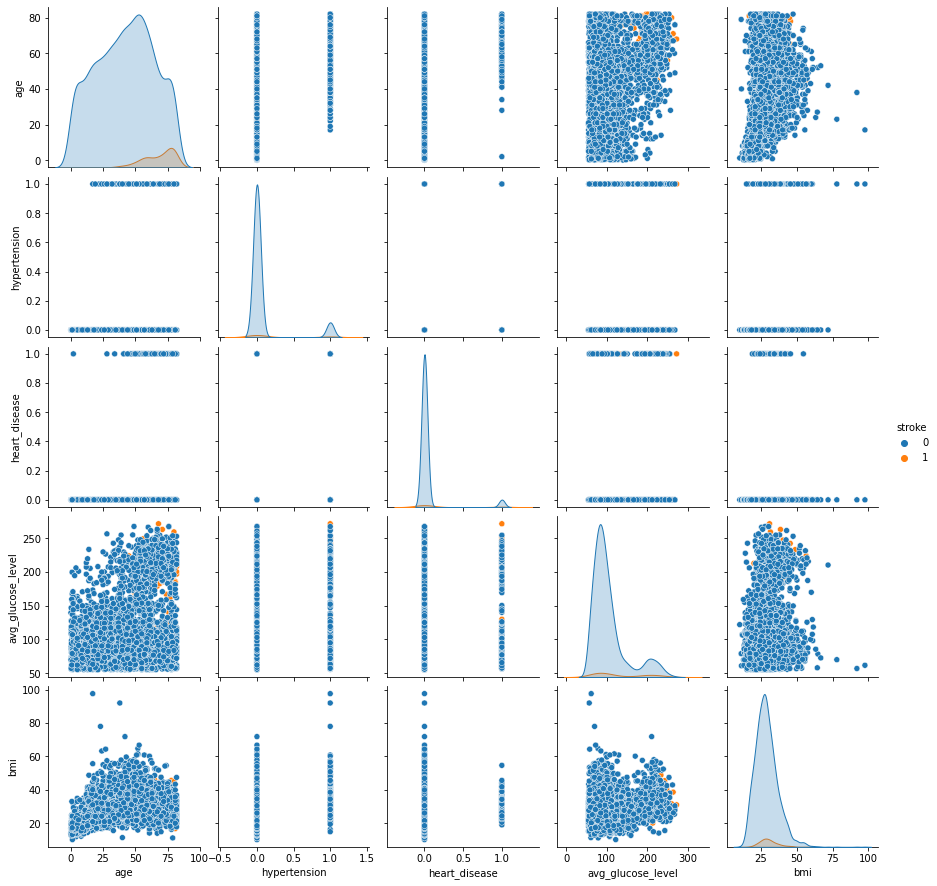

In [11]:
sns.pairplot(strokeData[strokeData.columns[1:]], hue='stroke')

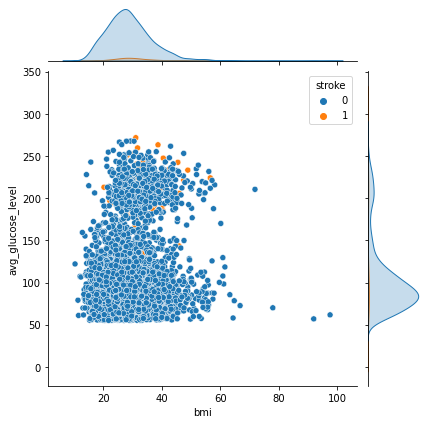

In [12]:
sns.jointplot(x='bmi',y='avg_glucose_level', data=strokeData, kind='scatter', hue='stroke')

### Cleaning Data

In [13]:
strokeData.drop('id', inplace=True, axis=1)

In [14]:
strokeData.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [15]:
strokeData.drop(strokeData.loc[strokeData['gender'] == 'Other'].index, inplace=True)

In [16]:
gender = pd.get_dummies(strokeData['gender'], drop_first=True)
gender

,Male
0,1
1,0
2,1
3,0
4,0
...,...
5105,0
5106,0
5107,0
5108,1


In [17]:
strokeData = pd.concat([strokeData, gender], axis=1)

In [18]:
strokeData.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Male
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0


In [19]:
strokeData.groupby('smoking_status')['age'].nunique()

smoking_status
Unknown            104
formerly smoked     73
never smoked        73
smokes              70
Name: age, dtype: int64

In [20]:
smokingStats = pd.get_dummies(strokeData['smoking_status'])

In [21]:
residenceStats = pd.get_dummies(strokeData['Residence_type'], drop_first=True)
residenceStats

,Urban
0,1
1,0
2,0
3,1
4,0
...,...
5105,1
5106,1
5107,0
5108,0


In [22]:
strokeDataCleaned = pd.concat([strokeData, smokingStats, residenceStats], axis=1)

In [23]:
strokeDataCleaned.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Male,Unknown,formerly smoked,never smoked,smokes,Urban
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,0,1,0,0,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0,0,0,1,0,0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,0,0,1,0,0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,0,0,0,1,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,0,0,1,0,0


In [24]:
strokeDataCleaned.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
Male                   0
Unknown                0
formerly smoked        0
never smoked           0
smokes                 0
Urban                  0
dtype: int64

In [25]:
strokeData.corr()['bmi']

age                  0.333314
hypertension         0.167770
heart_disease        0.041322
avg_glucose_level    0.175672
bmi                  1.000000
stroke               0.042341
Male                -0.026164
Name: bmi, dtype: float64

<AxesSubplot:xlabel='bmi', ylabel='Count'>

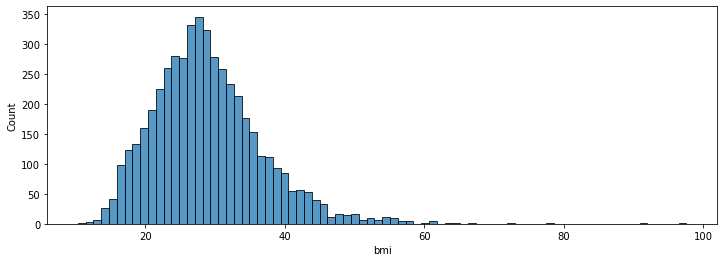

In [26]:
plt.figure(figsize=(12,4))
sns.histplot(strokeData['bmi'])

In [27]:
strokeData['bmi'].fillna(value=strokeData['bmi'].mean(), inplace=True)

In [28]:
strokeDataCleaned

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Male,Unknown,formerly smoked,never smoked,smokes,Urban
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,0,1,0,0,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0,0,0,1,0,0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,0,0,1,0,0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,0,0,0,1,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,0,0,0,1,0,1
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,0,0,0,1,0,1
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0,0,0,1,0,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,1,0,1,0,0,0


In [29]:
marriedStats = pd.get_dummies(strokeDataCleaned['ever_married'], drop_first=True)
marriedStats

,Yes
0,1
1,1
2,1
3,1
4,1
...,...
5105,1
5106,1
5107,1
5108,1


In [30]:
strokeDataCleaned = pd.concat([strokeDataCleaned, marriedStats], axis=1)

In [31]:
strokeDataCleaned.rename(columns={'Yes': 'Married'}, inplace=True)

In [32]:
strokeDataCleaned.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Male,Unknown,formerly smoked,never smoked,smokes,Urban,Married
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,0,1,0,0,1,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0,0,0,1,0,0,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,0,0,1,0,0,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,0,0,0,1,1,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,0,0,1,0,0,1


In [33]:
strokeDataCleaned.drop(['gender','ever_married','work_type','Residence_type','smoking_status'], axis=1,inplace=True)

In [34]:
strokeDataCleaned.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,Unknown,formerly smoked,never smoked,smokes,Urban,Married
0,67.0,0,1,228.69,36.6,1,1,0,1,0,0,1,1
1,61.0,0,0,202.21,NaN,1,0,0,0,1,0,0,1
2,80.0,0,1,105.92,32.5,1,1,0,0,1,0,0,1
3,49.0,0,0,171.23,34.4,1,0,0,0,0,1,1,1
4,79.0,1,0,174.12,24.0,1,0,0,0,1,0,0,1


### Using Logistic Regression

In [42]:
from sklearn.model_selection import train_test_split

In [50]:
strokeDataCleaned['bmi'].fillna(value=strokeDataCleaned['bmi'].mean(), inplace=True)

In [51]:
X = strokeDataCleaned[['age','hypertension','heart_disease','avg_glucose_level','bmi','Male','Urban','Married']]
y = strokeDataCleaned['stroke']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
logmodel2 = LogisticRegression(max_iter=1000)

In [55]:
logmodel2.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [56]:
pred = logmodel2.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
from sklearn.metrics import confusion_matrix, classification_report

In [58]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
print(confusion_matrix(y_test, pred))

[[1444    0]
 [  89    0]]


### Using KKN

In [60]:
sdc = strokeDataCleaned[['age','bmi','avg_glucose_level','stroke']]
sdc.head()

,age,bmi,avg_glucose_level,stroke
0,67.0,36.60000,228.69,1
1,61.0,28.89456,202.21,1
2,80.0,32.50000,105.92,1
3,49.0,34.40000,171.23,1
4,79.0,24.00000,174.12,1


In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scale = StandardScaler()

In [63]:
scale.fit(sdc.drop('stroke', axis=1))

StandardScaler()

In [64]:
scaledSdc = scale.transform(sdc.drop('stroke',axis=1))
scaledSdc

array([[ 1.05124201e+00,  1.00103390e+00,  2.70644995e+00],
       [ 7.85888689e-01,  1.38462701e-15,  2.12165168e+00],
       [ 1.62617420e+00,  4.68392163e-01, -4.86741416e-03],
       ...,
       [-3.63975698e-01,  2.21558189e-01, -5.11265616e-01],
       [ 3.43633155e-01, -4.28004903e-01,  1.32837547e+00],
       [ 3.40542820e-02, -3.50057332e-01, -4.60692049e-01]])

In [65]:
ssdc = pd.DataFrame(scaledSdc, columns=sdc.columns[:3])
ssdc.head()

,age,bmi,avg_glucose_level
0,1.051242,1.001034e+00,2.706450
1,0.785889,1.384627e-15,2.121652
2,1.626174,4.683922e-01,-0.004867
3,0.255182,7.152261e-01,1.437473
4,1.581949,-6.358651e-01,1.501297


In [66]:
X = ssdc
y = sdc['stroke']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
kmodel = KNeighborsClassifier(n_neighbors=1)

In [70]:
kmodel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [71]:
prediction = kmodel.predict(X_test)

In [72]:
print(confusion_matrix(y_test, prediction))

[[1518   72]
 [  80   16]]


In [73]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1590
           1       0.18      0.17      0.17        96

    accuracy                           0.91      1686
   macro avg       0.57      0.56      0.56      1686
weighted avg       0.91      0.91      0.91      1686



In [ ]:
sdc

### Using single Decision Tree 

In [82]:
strokeDataCleaned.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,Unknown,formerly smoked,never smoked,smokes,Urban,Married
0,67.0,0,1,228.69,36.60000,1,1,0,1,0,0,1,1
1,61.0,0,0,202.21,28.89456,1,0,0,0,1,0,0,1
2,80.0,0,1,105.92,32.50000,1,1,0,0,1,0,0,1
3,49.0,0,0,171.23,34.40000,1,0,0,0,0,1,1,1
4,79.0,1,0,174.12,24.00000,1,0,0,0,1,0,0,1


In [88]:
X = strokeDataCleaned.drop('stroke', axis=1)
y = strokeDataCleaned['stroke']


In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
tm = DecisionTreeClassifier()

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [94]:
tm.fit(X_train, y_train)

DecisionTreeClassifier()

In [97]:
treePred = tm.predict(X_test)

In [98]:
print(confusion_matrix(y_test, treePred))
print('\n')
print(classification_report(y_test, treePred))

[[1511   79]
 [  81   15]]


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1590
           1       0.16      0.16      0.16        96

    accuracy                           0.91      1686
   macro avg       0.55      0.55      0.55      1686
weighted avg       0.90      0.91      0.90      1686



### Using Random Forest

In [74]:
strokeDataCleaned.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,Unknown,formerly smoked,never smoked,smokes,Urban,Married
0,67.0,0,1,228.69,36.60000,1,1,0,1,0,0,1,1
1,61.0,0,0,202.21,28.89456,1,0,0,0,1,0,0,1
2,80.0,0,1,105.92,32.50000,1,1,0,0,1,0,0,1
3,49.0,0,0,171.23,34.40000,1,0,0,0,0,1,1,1
4,79.0,1,0,174.12,24.00000,1,0,0,0,1,0,0,1


In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [76]:
rfc = RandomForestClassifier(n_estimators=200, )

In [77]:
X = strokeDataCleaned.drop('stroke', axis=1)
y = strokeDataCleaned['stroke']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [79]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [80]:
predictions = rfc.predict(X_test)

In [81]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[1590    0]
 [  96    0]]


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1590
           1       0.00      0.00      0.00        96

    accuracy                           0.94      1686
   macro avg       0.47      0.50      0.49      1686
weighted avg       0.89      0.94      0.92      1686



C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest without smoking category

In [99]:
strokeDataCleaned.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,Unknown,formerly smoked,never smoked,smokes,Urban,Married
0,67.0,0,1,228.69,36.60000,1,1,0,1,0,0,1,1
1,61.0,0,0,202.21,28.89456,1,0,0,0,1,0,0,1
2,80.0,0,1,105.92,32.50000,1,1,0,0,1,0,0,1
3,49.0,0,0,171.23,34.40000,1,0,0,0,0,1,1,1
4,79.0,1,0,174.12,24.00000,1,0,0,0,1,0,0,1


In [100]:
strokeDataCleaned.drop(['Unknown','formerly smoked','never smoked','smokes'], axis=1, inplace=True)

In [101]:
strokeDataCleaned.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,Urban,Married
0,67.0,0,1,228.69,36.60000,1,1,1,1
1,61.0,0,0,202.21,28.89456,1,0,0,1
2,80.0,0,1,105.92,32.50000,1,1,0,1
3,49.0,0,0,171.23,34.40000,1,0,1,1
4,79.0,1,0,174.12,24.00000,1,0,0,1


In [102]:
rfc2 = RandomForestClassifier()

In [103]:
X = strokeDataCleaned.drop('stroke', axis=1)
y = strokeDataCleaned['stroke']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [105]:
rfc2.fit(X_train, y_train)

RandomForestClassifier()

In [106]:
pred = rfc2.predict(X_test)

In [107]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[1460    7]
 [  66    0]]


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1467
           1       0.00      0.00      0.00        66

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.92      0.95      0.93      1533



### Random Forest with RandomizedSearchCV

In [108]:
from sklearn.model_selection import RandomizedSearchCV

In [115]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

random_grid


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [116]:
rfc2 = RandomForestClassifier()

In [117]:
rf_random = RandomizedSearchCV(estimator=rfc2, param_distributions=random_grid, n_iter=20, cv=3, verbose=3)

In [118]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_depth=20, score=0.949, total=   0.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_depth=20, score=0.949, total=   0.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_depth=20 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_depth=20, score=0.949, total=   0.7s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, score=0.949, total=   6.1s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, score=0.949, total=   6.4s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, score=0.949, total=   7.1s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=70 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=70, sc

[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=90, score=0.949, total=   2.9s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=90 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=90, score=0.949, total=   3.0s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=90 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=90, score=0.948, total=   3.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=70 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=70, score=0.946, total=   0.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=70 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=70, score=0.9

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  4.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=3)

In [122]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 20}

In [123]:
best_random = rf_random.best_estimator_

In [126]:
rcfPred = best_random.predict(X_test)

In [127]:
print(confusion_matrix(y_test, rcfPred))
print('\n')
print(classification_report(y_test, rcfPred))

[[1467    0]
 [  66    0]]


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1467
           1       0.00      0.00      0.00        66

    accuracy                           0.96      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.92      0.96      0.94      1533



C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest with GridSearchCV

In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:
rcf3 = RandomForestClassifier()

In [133]:
"""
Setting param_grid based on the RandomSearchCV best_param_ result
"""

param_grid = {
    'max_depth': [10, 20, 30, 40],
    'max_features': ['log2'],
    'min_samples_leaf': [3, 4, 5, 6],
    'min_samples_split': [3, 4, 5],
    'n_estimators': [150, 200, 250]
}

In [134]:
grid_search = GridSearchCV(rcf3, param_grid, verbose=3, cv=3, n_jobs = -1)

In [135]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  3.2min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['log2'],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [150, 200, 250]},
             verbose=3)

In [136]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 150}

In [137]:
gridCrfPred = grid_search.predict(X_test)

In [138]:
print(confusion_matrix(y_test, gridCrfPred))
print('\n')
print(classification_report(y_test, gridCrfPred))

[[1467    0]
 [  66    0]]


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1467
           1       0.00      0.00      0.00        66

    accuracy                           0.96      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.92      0.96      0.94      1533



C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Using Support Vector Machine (SVM)

In [139]:
from sklearn.svm import SVC

In [140]:
svcModel = SVC()

In [143]:
svcModel.fit(X_train, y_train)

SVC()

In [144]:
svcPred = svcModel.predict(X_test)

In [145]:
print(confusion_matrix(y_test, svcPred))
print('\n')
print(classification_report(y_test, svcPred))

[[1467    0]
 [  66    0]]


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1467
           1       0.00      0.00      0.00        66

    accuracy                           0.96      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.92      0.96      0.94      1533



C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
